In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'F:\PGDS\Hackathons\DataHack\train_BM.csv')

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# # missing value %age
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [6]:
df.fillna(0, inplace= True)

In [7]:
df.Gender = np.where(df.Gender== 'M',1,0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

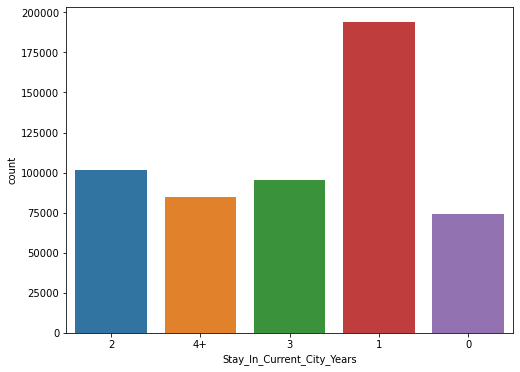

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'Stay_In_Current_City_Years',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

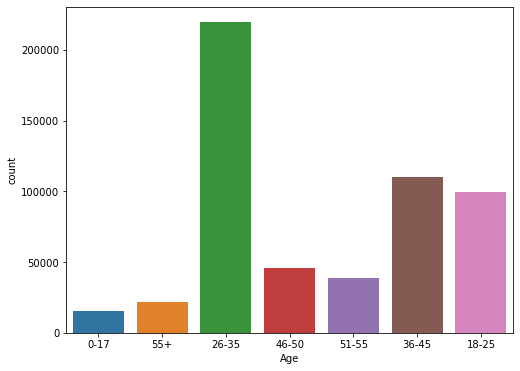

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'Age',data=df)

<AxesSubplot:>

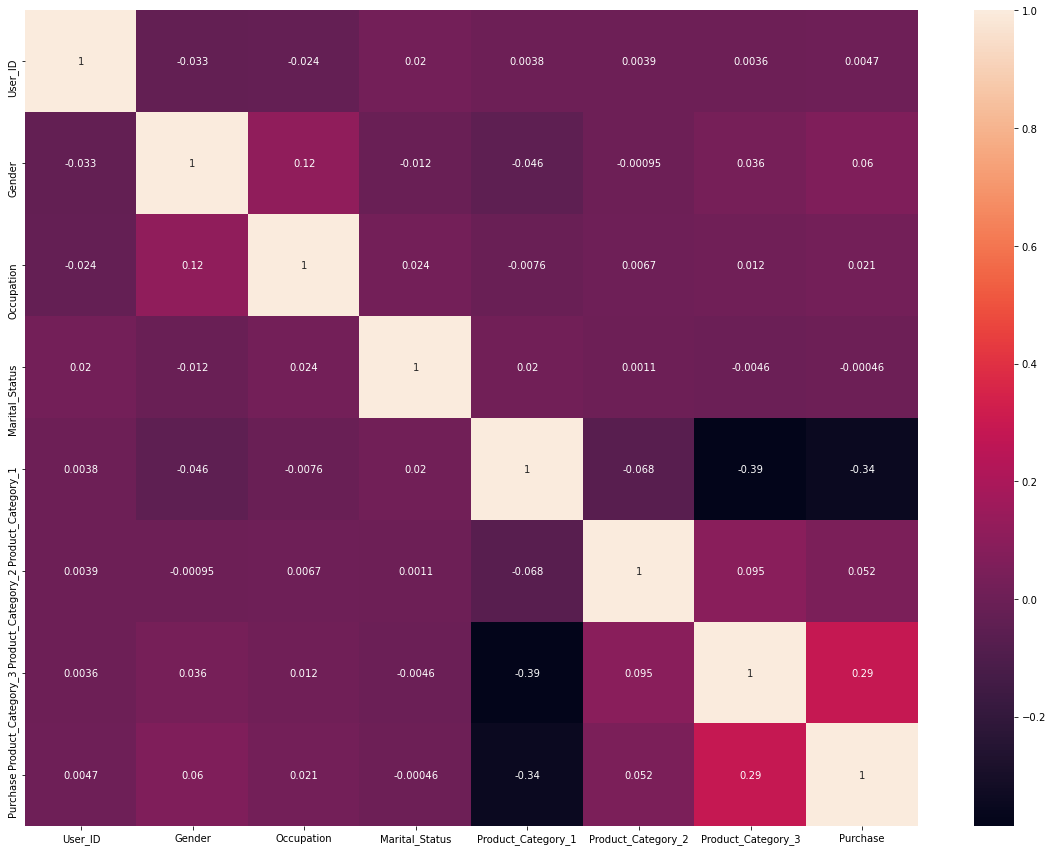

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
LA= LabelEncoder()
df['Product_ID']= LA.fit_transform(df['Product_ID'])
df.Age = LA.fit_transform(df.Age)
df= df.drop(['City_Category','Marital_Status', 'Stay_In_Current_City_Years'],axis=1)
df =df[['User_ID','Product_ID', 'Gender','Age','Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,3,0.0,0.0,8370
1,1000001,2376,0,0,10,1,6.0,14.0,15200
2,1000001,852,0,0,10,12,0.0,0.0,1422
3,1000001,828,0,0,10,12,14.0,0.0,1057
4,1000002,2734,1,6,16,8,0.0,0.0,7969
5,1000003,1831,1,2,15,1,2.0,0.0,15227
6,1000004,1745,1,4,7,1,8.0,17.0,19215
7,1000004,3320,1,4,7,1,15.0,0.0,15854
8,1000004,3604,1,4,7,1,16.0,0.0,15686
9,1000005,2631,1,2,20,8,0.0,0.0,7871


<AxesSubplot:>

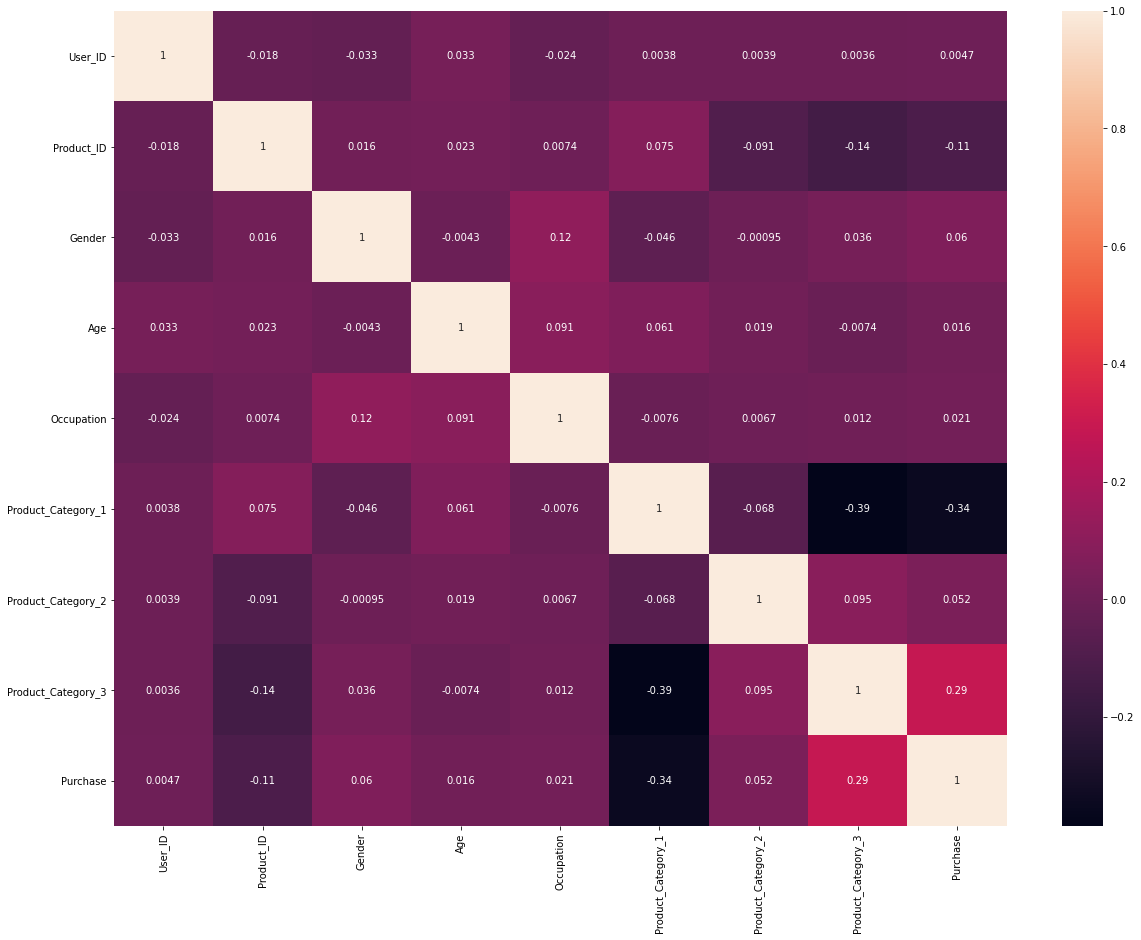

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

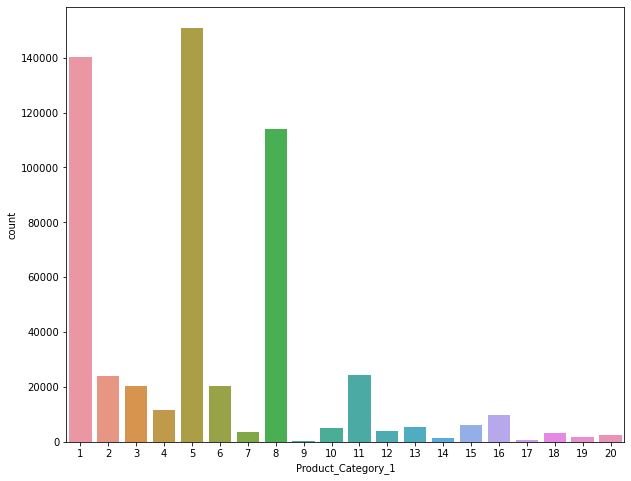

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'Product_Category_1',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

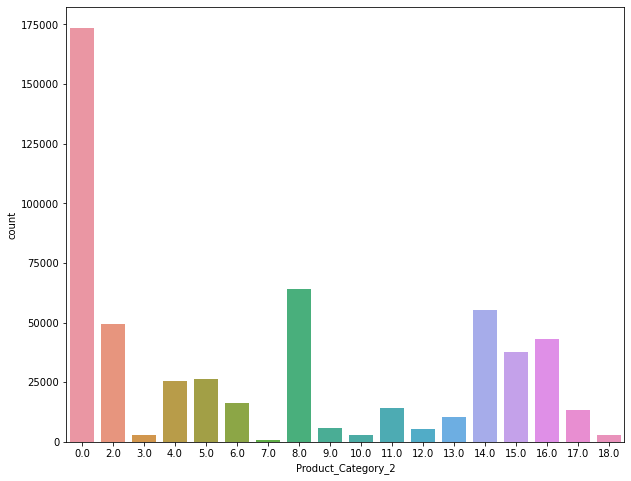

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'Product_Category_2',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

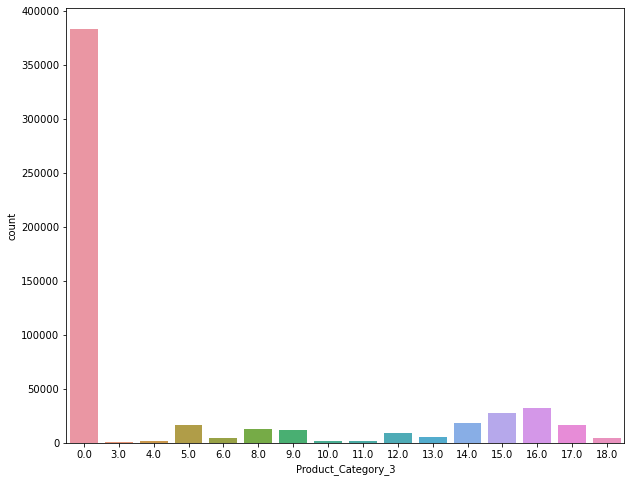

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'Product_Category_3',data=df)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Purchase'], axis=1)
Y= df['Purchase']

In [ ]:
X_train ,X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.3 , random_state= 1)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
print(X_train.size,X_test.size,Y_train.size)

In [ ]:
# pip install statsmodels
# import statsmodels.api as sm

# # and fitting the model 
# X_train = sm.add_constant(X_train)
# model3 = sm.OLS(Y_train, X_train)
# results = model3.fit() 
# # printing the summary table 
# print(results.summary()) 

In [ ]:
# y_pred = results.predict(X_test)
# from sklearn.metrics import mean_squared_error,r2_score
# rmse = np.sqrt(MSE(Y_test, y_pred)) 
# print("RMSE : % f" %(rmse))
# r2 = r2_score(Y_test, y_pred)
# print('R2:', r2)

#### rmse = , r2 = 

In [ ]:
#from sklearn.model_selection import train_test_split
X = df.drop(['Purchase'], axis=1)
Y= df['Purchase']
X_train ,X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.3 , random_state= 1)

In [ ]:
# # import the regressor 
# from sklearn.linear_model import LinearRegression 

# # create a regressor object 
# regressor = LinearRegression()

# # fit the regressor with X and Y data 
# regressor.fit(X_train, Y_train) 
# y_pred= regressor.predict(X_test)

# from sklearn.metrics import mean_squared_error,r2_score
# mse =mean_squared_error(Y_test, y_pred)
# print('MSE:',mse)
# rmse = np.sqrt(mse)
# print('RMSE:', rmse)
# r2 = r2_score(Y_test, y_pred)
# print('R2:', r2)

#### rmse =  , r2 =

In [ ]:
#from sklearn.model_selection import train_test_split
X = df.drop(['Purchase'], axis=1)
Y= df['Purchase']
X_train ,X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.3 , random_state= 1)

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# regressor = KNeighborsRegressor(n_neighbors=5)
# modelKNN = regressor.fit(X_train, Y_train)
# y_pred = regressor.predict(X_test)

# from sklearn.metrics import mean_squared_error as MSE , r2_score
# rmse = np.sqrt(MSE(Y_test, y_pred)) 
# print("RMSE : % f" %(rmse))
# r2 = r2_score(Y_test, y_pred)
# print('R2:', r2)

# ####RMSE = 4429 r2=0.22

In [ ]:
#from sklearn.model_selection import train_test_split
X = df.drop(['Purchase'], axis=1)
Y= df['Purchase']
X_train ,X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.3 , random_state= 1)

In [ ]:
# # import the regressor 
# from sklearn.tree import DecisionTreeRegressor 

# # create a regressor object 
# regressor = DecisionTreeRegressor() 

# # fit the regressor with X and Y data 
# model2= regressor.fit(X_train, Y_train)
# y_pred = regressor.predict(X_test)

# from sklearn.metrics import mean_squared_error,r2_score
# mse =mean_squared_error(Y_test, y_pred)
# print('MSE:',mse)
# rmse = np.sqrt(mse)
# print('RMSE:', rmse)
# r2 = r2_score(Y_test, y_pred)
# print('R2:', r2)

#### rmse =   , r2 =

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(['Purchase'], axis=1)
Y= df['Purchase']
X_train ,X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.3 , random_state= 1)

In [17]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
model_rf= reg_rf.fit(X_train, Y_train)
y_pred = reg_rf.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
mse =mean_squared_error(Y_test, y_pred)
print('MSE:',mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(Y_test, y_pred)
print('R2:', r2)

### rmse = 2816.01  , r2 = 0.686

MSE: 7927595.514669694
RMSE: 2815.5986068098723
R2: 0.6863281540977846


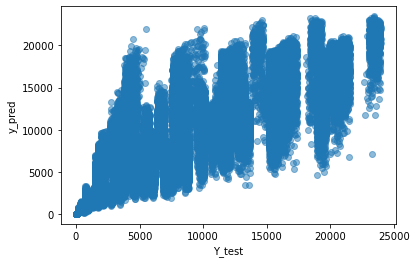

In [18]:
plt.scatter(Y_test, y_pred, alpha= 0.5)
plt.xlabel('Y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
# import xgboost as xg
# # Train and test set are converted to DMatrix objects, 
# # as it is required by learning API. 
# train_dmatrix = xg.DMatrix(data = X_train, label = Y_train)
# xgb_r= xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
# # Fitting the model 
# modelXGB= xgb_r.fit(X_train, Y_train)
# y_pred = xgb_r.predict(X_test)

# from sklearn.metrics import mean_squared_error as MSE , r2_score
# rmse = np.sqrt(MSE(Y_test, y_pred)) 
# print("RMSE : % f" %(rmse))
# r2 = r2_score(Y_test, y_pred)
# print('R2:', r2)

# ####RMSE= 2857.24, R2= 0.6769

In [ ]:
np.set_printoptions(suppress= True)
print('Predicted_Labels:',(y_pred)[:10])
print('Actual Labels:' ,  Y_test[:10])

In [25]:
test_df = pd.read_csv(r'F:\PGDS\Hackathons\DataHack\test_BM.csv')

In [26]:
test_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [27]:
# # missing value %age
test_df.isnull().sum()/len(test_df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [28]:
#test_df.fillna(test_df.mean(), inplace= True)
test_df.fillna(0, inplace= True)
test_df.Gender = np.where(test_df.Gender== 'M',1,0)
test_df['Product_ID']= LA.fit_transform(test_df['Product_ID'])
test_df.Age = LA.fit_transform(test_df.Age)
test_df= test_df.drop(['City_Category','Marital_Status', 'Stay_In_Current_City_Years'],axis=1)
test_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,1144,1,4,7,1,11.0,0.0
1,1000009,994,1,2,17,3,5.0,0.0
2,1000010,2672,0,3,1,5,14.0,0.0
3,1000010,1299,0,3,1,4,9.0,0.0
4,1000011,519,0,2,1,4,5.0,12.0
5,1000013,3240,1,4,1,2,3.0,15.0
6,1000013,1399,1,4,1,1,11.0,15.0
7,1000013,3437,1,4,1,2,4.0,9.0
8,1000015,1458,1,2,7,10,13.0,16.0
9,1000022,638,1,1,15,5,14.0,0.0


In [29]:
X_t= test_df

In [30]:
final_pred = reg_rf.predict(X_t)
print(final_pred)
final_pred

[ 6048.54  9975.08  4234.43 ... 14292.02 21947.04  2302.92]


array([ 6048.54,  9975.08,  4234.43, ..., 14292.02, 21947.04,  2302.92])

In [31]:
df3 = pd.read_csv(r'F:\PGDS\Hackathons\DataHack\test_BM.csv')
df3['Purchase']= final_pred
df3.head()
final_sub = df3[['Purchase','User_ID', 'Product_ID']]
final_sub.head()

,Purchase,User_ID,Product_ID
0,6048.54,1000004,P00128942
1,9975.08,1000009,P00113442
2,4234.43,1000010,P00288442
3,2447.18,1000010,P00145342
4,2432.73,1000011,P00053842


In [32]:
final_sub.to_csv('Blackfriday_RF.csv')